In [1]:
from Preprocess import PreProcess
import pandas as pd
import numpy as np
from models.DecisionTreeRegressor import OurDecisionTreeRegressor
from models.RandomForestRegressor import OurRandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from scoreFunc import Scores
from sklearn.ensemble import RandomForestRegressor
import  matplotlib.pyplot as plt
from tqdm import notebook

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/jena_climate_2009_2016.csv')
df["Date Time"]=pd.to_datetime(df["Date Time"])

In [4]:
pr=PreProcess(df, ddir='data/output.txt', target_col='T (degC)', shift_day=7)

# Daily 

In [9]:
X_train, y_train, X_test, y_test=pr.split_data(day_number=30, day_pred=1, day_start=0)

1
(144,)


In [10]:
## Based on the score from LeftOneOUT
important_features=['VPmax (mbar)shift-1','wv (m/s)shift-2','T (degC)shift-3','T (degC)shift-2','wv (m/s)shift-1','wv (m/s)shift-5']

In [11]:
X_train, y_train, X_test, y_test=X_train[important_features], y_train, X_test[important_features], y_test

In [12]:
regressor =OurDecisionTreeRegressor()
regressor=regressor.fit(X_train, y_train, min_leaf=10,max_depth=8)
pred_dectest = regressor.predict(X_test)
daily_scoreDt=Scores.mean_squared_errors(pred_dectest, y_test)
print(daily_scoreDt)

0.004806940221408408


In [13]:
regressordtl = DecisionTreeRegressor(random_state=0, max_depth=8)
regressordtl=regressordtl.fit(X_train, y_train)
pred_dectltest=regressordtl.predict(X_test)
daily_scoreDtl=Scores.mean_squared_errors(pred_dectltest, y_test)
print(daily_scoreDtl)

0.005207228341552028


In [14]:
rf=OurRandomForestRegressor(X_train, y_train, min_leaf=10,max_depth=8, max_feature=4,\
                            max_sample=int(X_train.shape[0]*0.9),tree_number=20, random_seed=0, bootstrap=False)

rf=rf.fit()
pred_rftest=rf.predict(X_test)
daily_scoreRf=Scores.mean_squared_errors(pred_rftest, y_test)
daily_scoreRf

0.003330915881187607

In [16]:
reg=RandomForestRegressor(max_depth=8, min_samples_leaf=10, n_estimators=20, random_state=0)
reg.fit(X_train, y_train)
pred_drf=reg.predict(X_test)
daily_scoreRFL=Scores.mean_squared_errors(pred_drf, y_test)
daily_scoreRFL

0.0038815137727477955

In [23]:
df_daily=pd.DataFrame({"Score":[daily_scoreDt, daily_scoreDtl, daily_scoreRf, daily_scoreRFL]}, index=["Decision Tree Implement",'Decision Tree Library','Random forest Implement',\
                                                                   'Random Forest Library'])

In [25]:
DecisionTreeDailyCompare=df_daily.iloc[:2]

In [26]:
DecisionTreeDailyCompare.sort_values(by="Score")

,Score
Decision Tree Implement,0.004807
Decision Tree Library,0.005207


In [27]:
RandomForestDailyCompare=df_daily.iloc[2:]
RandomForestDailyCompare.sort_values(by='Score')

,Score
Random forest Implement,0.003331
Random Forest Library,0.003882


In [24]:
df_daily.sort_values(by='Score')

,Score
Random forest Implement,0.003331
Random Forest Library,0.003882
Decision Tree Implement,0.004807
Decision Tree Library,0.005207


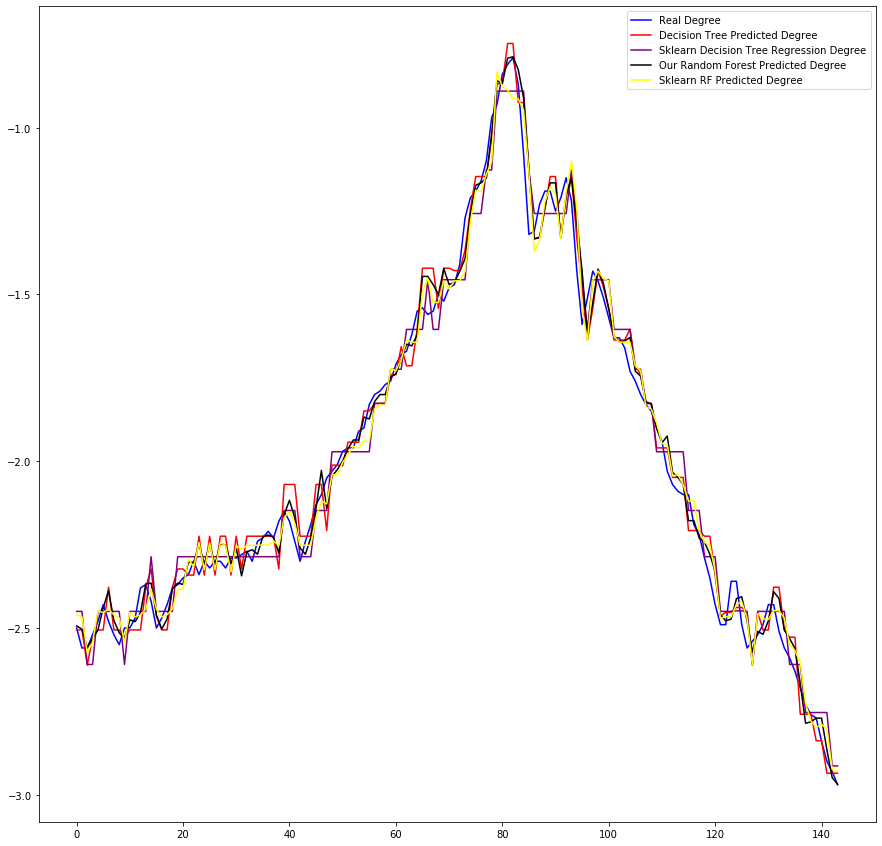

In [28]:
k=y_test.copy()
k.index=range(0, len(y_test),1)

fig=plt.figure(figsize=(15,15))
plt.plot(k, 'blue', label='Real Degree')
plt.plot(pred_dectest, 'red', label='Decision Tree Predicted Degree')
plt.plot(pred_dectltest, 'purple', label='Sklearn Decision Tree Regression Degree')
plt.plot(pred_rftest, 'black', label='Our Random Forest Predicted Degree')
plt.plot(pred_drf, 'yellow', label='Sklearn RF Predicted Degree')

plt.legend()
plt.show()

# Weekly

In [3]:
#pr=PreProcess(df, ddir='data/output.txt', target_col='T (degC)', shift_day=7)

In [31]:
X_train=[] 
y_train=[]
X_test=[] 
y_test=[]
X_train, y_train, X_test, y_test=pr.split_data(day_number=30, day_pred=7, day_start=0)
X_train, y_train, X_test, y_test=X_train[important_features], y_train, X_test[important_features], y_test

1
(1008,)


In [32]:
regressor =OurDecisionTreeRegressor()
regressor=regressor.fit(X_train, y_train, min_leaf=10,max_depth=8)
pred_dectest = regressor.predict(X_test)
weekly_scoreDt=Scores.mean_squared_errors(pred_dectest, y_test)
print(weekly_scoreDt)

0.12974785559451238


In [33]:
regressordtl = DecisionTreeRegressor(random_state=0, max_depth=8)
regressordtl=regressordtl.fit(X_train, y_train)
pred_dectltest=regressordtl.predict(X_test)
weekly_scoreDtl=Scores.mean_squared_errors(pred_dectltest, y_test)
print(weekly_scoreDtl)

0.11405577907405257


In [34]:
rf=OurRandomForestRegressor(X_train, y_train, min_leaf=10,max_depth=8, max_feature=4,\
                            max_sample=int(X_train.shape[0]*0.9),tree_number=20, random_seed=0, bootstrap=False)

rf=rf.fit()
pred_rftest=rf.predict(X_test)
weekly_scoreRf=Scores.mean_squared_errors(pred_rftest, y_test)
weekly_scoreRf

0.12623063428120151

In [35]:
reg=RandomForestRegressor(max_depth=8, min_samples_leaf=10, n_estimators=20, random_state=0)
reg.fit(X_train, y_train)
pred_drf=reg.predict(X_test)
weekly_scoreRfL=Scores.mean_squared_errors(pred_drf, y_test)
weekly_scoreRfL

0.126671574363522

In [36]:
df_weeklyTog=pd.DataFrame({"Score":[weekly_scoreDt, weekly_scoreDtl, weekly_scoreRf, weekly_scoreRfL]}, index=["Decision Tree Implement",'Decision Tree Library','Random forest Implement',\
                                                                   'Random Forest Library'])

In [37]:
DecisionTreeWeeklyCompare=df_weeklyTog.iloc[:2]
DecisionTreeWeeklyCompare.sort_values(by='Score')

,Score
Decision Tree Library,0.114056
Decision Tree Implement,0.129748


In [38]:
RandomForestWeeklyCompare=df_weeklyTog.iloc[2:]
RandomForestWeeklyCompare.sort_values(by='Score')

,Score
Random forest Implement,0.126231
Random Forest Library,0.126672


In [39]:
df_weeklyTog.sort_values(by='Score')

,Score
Decision Tree Library,0.114056
Random forest Implement,0.126231
Random Forest Library,0.126672
Decision Tree Implement,0.129748


# Weekly By Sliding

In [40]:
DT_scoresWeek=[]
DTL_scoresWeek=[]
RF_scoresWeek=[]
RFL_scoresWeek=[]
for i in notebook.tqdm(range(0,7)):
    X_train=[] 
    y_train=[]
    X_test=[] 
    y_test=[]
    X_train, y_train, X_test, y_test=pr.split_data(day_number=30, day_start=i, day_pred=1)
    X_train, y_train, X_test, y_test=X_train[important_features], y_train, X_test[important_features], y_test
    regressor = OurDecisionTreeRegressor()
    regressor=regressor.fit(X_train, y_train, min_leaf=10,max_depth=8)
    pred_dectest = regressor.predict(X_test)
    daily_scoreDt=Scores.mean_squared_errors(pred_dectest, y_test)
    DT_scoresWeek.append(daily_scoreDt)
    
    regressordtl = DecisionTreeRegressor(random_state=0, max_depth=8)
    regressordtl=regressordtl.fit(X_train, y_train)
    pred_dectltest=regressordtl.predict(X_test)
    daily_scoreDtl=Scores.mean_squared_errors(pred_dectltest, y_test)
    DTL_scoresWeek.append(daily_scoreDtl)
    
    rf=OurRandomForestRegressor(X_train, y_train, min_leaf=10,max_depth=8, max_feature=4,\
                            max_sample=int(X_train.shape[0]*0.9),tree_number=20, random_seed=0, bootstrap=False)

    rf=rf.fit()
    pred_rftest=rf.predict(X_test)
    daily_scoreRf=Scores.mean_squared_errors(pred_rftest, y_test)
    RF_scoresWeek.append(daily_scoreRf)
    
    reg=RandomForestRegressor(max_depth=8, min_samples_leaf=10, n_estimators=20, random_state=0)
    reg.fit(X_train, y_train)
    pred_drf=reg.predict(X_test)
    daily_scoreRFL=Scores.mean_squared_errors(pred_drf, y_test)
    RFL_scoresWeek.append(daily_scoreRFL)

1
(144,)
4465
(144,)
8497
(144,)
12961
(144,)
17281
(144,)
21745
(144,)
26065
(144,)



In [41]:
df_weekly=pd.DataFrame([DT_scoresWeek, DTL_scoresWeek, RF_scoresWeek,RFL_scoresWeek], \
                       columns=["Day 1 Error",'Day 2 Error','Day 3 Error', 'Day 4 Error', 'Day5 Error', 'Day 6 Error', 'Day 7 Error'],
                       index=['Decision Tree Implementation', 'Decision Tree Library', 'Random Forest Implementation', 'Random Forest Library'])

In [42]:
df_weekly.insert(0, 'Average', df_weekly.mean(axis=1))

In [43]:
DecisionTreeSWeeklyCompare=df_weekly.iloc[:2]
DecisionTreeSWeeklyCompare.sort_values(by='Average')

,Average,Day 1 Error,Day 2 Error,Day 3 Error,Day 4 Error,Day5 Error,Day 6 Error,Day 7 Error
Decision Tree Library,0.095840,0.005207,0.006401,0.060900,0.107412,0.085761,0.055373,0.349823
Decision Tree Implementation,0.097035,0.004807,0.007531,0.043144,0.105929,0.056467,0.055256,0.406109


In [44]:
RandomForestSWeeklyCompare=df_weekly.iloc[2:]
RandomForestSWeeklyCompare.sort_values(by='Average')

,Average,Day 1 Error,Day 2 Error,Day 3 Error,Day 4 Error,Day5 Error,Day 6 Error,Day 7 Error
Random Forest Implementation,0.089821,0.003331,0.005477,0.040687,0.102720,0.051298,0.046644,0.378590
Random Forest Library,0.103298,0.003882,0.004699,0.039168,0.102131,0.054509,0.042049,0.476647


In [45]:
df_weekly.sort_values(by='Average')

,Average,Day 1 Error,Day 2 Error,Day 3 Error,Day 4 Error,Day5 Error,Day 6 Error,Day 7 Error
Random Forest Implementation,0.089821,0.003331,0.005477,0.040687,0.102720,0.051298,0.046644,0.378590
Decision Tree Library,0.095840,0.005207,0.006401,0.060900,0.107412,0.085761,0.055373,0.349823
Decision Tree Implementation,0.097035,0.004807,0.007531,0.043144,0.105929,0.056467,0.055256,0.406109
Random Forest Library,0.103298,0.003882,0.004699,0.039168,0.102131,0.054509,0.042049,0.476647


# Monthly 

In [46]:
X_train=[] 
y_train=[]
X_test=[] 
y_test=[]
X_train, y_train, X_test, y_test=pr.split_data(day_number=70, day_pred=30, day_start=0)

1
(4320,)


In [47]:
X_train, y_train, X_test, y_test=X_train[important_features], y_train, X_test[important_features], y_test

In [48]:
regressor =OurDecisionTreeRegressor()
regressor=regressor.fit(X_train, y_train, min_leaf=10,max_depth=8)
pred_dectest = regressor.predict(X_test)
monthly_scoreDt=Scores.mean_squared_errors(pred_dectest, y_test)
print(monthly_scoreDt)

5.724813743524101


In [49]:
regressordtl = DecisionTreeRegressor(random_state=0, max_depth=8)
regressordtl=regressordtl.fit(X_train, y_train)
pred_dectltest=regressordtl.predict(X_test)
monthly_scoreDtl=Scores.mean_squared_errors(pred_dectltest, y_test)
print(monthly_scoreDtl)

5.754603238181509


In [51]:
rf=OurRandomForestRegressor(X_train, y_train, min_leaf=10,max_depth=8, max_feature=4,\
                            max_sample=int(X_train.shape[0]*0.9),tree_number=20, random_seed=0, bootstrap=False)

rf=rf.fit()
pred_rftest=rf.predict(X_test)
monthly_scoreRf=Scores.mean_squared_errors(pred_rftest, y_test)
monthly_scoreRf

5.659833136054634

In [52]:
reg=RandomForestRegressor(max_depth=8, min_samples_leaf=10, n_estimators=20, random_state=0)
reg.fit(X_train, y_train)
pred_drf=reg.predict(X_test)
monthly_scoreRFL=Scores.mean_squared_errors(pred_drf, y_test)
monthly_scoreRFL

5.475431469180387

In [53]:
df_monthlyTog=pd.DataFrame({"Score":[monthly_scoreDt, monthly_scoreDtl, monthly_scoreRf, monthly_scoreRFL]}, index=["Decision Tree Implement",'Decision Tree Library','Random forest Implement',\
                                                                   'Random Forest Library'])

In [54]:
DecisionTreeMonthlyCompare=df_monthlyTog.iloc[:2]
DecisionTreeMonthlyCompare.sort_values(by='Score')

,Score
Decision Tree Implement,5.724814
Decision Tree Library,5.754603


In [55]:
RandomForestMonthlyCompare=df_monthlyTog.iloc[2:]
RandomForestMonthlyCompare.sort_values(by='Score')

,Score
Random Forest Library,5.475431
Random forest Implement,5.659833


In [56]:
df_monthlyTog.sort_values(by='Score')

,Score
Random Forest Library,5.475431
Random forest Implement,5.659833
Decision Tree Implement,5.724814
Decision Tree Library,5.754603


# Monthly Sliding Windows

In [ ]:
DT_scoresMonth=[]
DTL_scoresMonth=[]
RF_scoresMonth=[]
RFL_scoresMonth=[]
for i in notebook.tqdm(range(0,30)):
    X_train=[] 
    y_train=[]
    X_test=[] 
    y_test=[]
    X_train, y_train, X_test, y_test=pr.split_data(day_number=30, day_start=i, day_pred=1)
    X_train, y_train, X_test, y_test=X_train[important_features], y_train, X_test[important_features], y_test
    regressor = OurDecisionTreeRegressor()
    regressor=regressor.fit(X_train, y_train, min_leaf=10,max_depth=8)
    pred_dectest = regressor.predict(X_test)
    daily_scoreDt=Scores.mean_squared_errors(pred_dectest, y_test)
    DT_scoresMonth.append(daily_scoreDt)
    
    regressordtl = DecisionTreeRegressor(random_state=0, max_depth=8)
    regressordtl=regressordtl.fit(X_train, y_train)
    pred_dectltest=regressordtl.predict(X_test)
    daily_scoreDtl=Scores.mean_squared_errors(pred_dectltest, y_test)
    DTL_scoresMonth.append(daily_scoreDtl)
    
    rf=OurRandomForestRegressor(X_train, y_train, min_leaf=10,max_depth=8, max_feature=4,\
                            max_sample=int(X_train.shape[0]*0.9),tree_number=20, random_seed=0, bootstrap=False)

    rf=rf.fit()
    pred_rftest=rf.predict(X_test)
    daily_scoreRf=Scores.mean_squared_errors(pred_rftest, y_test)
    RF_scoresMonth.append(daily_scoreRf)
    
    reg=RandomForestRegressor(max_depth=8, min_samples_leaf=10, n_estimators=20, random_state=0)
    reg.fit(X_train, y_train)
    pred_drf=reg.predict(X_test)
    daily_scoreRFL=Scores.mean_squared_errors(pred_drf, y_test)
    RFL_scoresMonth.append(daily_scoreRFL)
    
    

1
(144,)
4465
(144,)
8497
(144,)
12961
(144,)
17281
(144,)
21745
(144,)
26065
(144,)
30529
(144,)
34993
(144,)
39313
(144,)
43777
(144,)
48097
(144,)
1729
(144,)
1873
(144,)
2017
(144,)
2161
(144,)


In [12]:
df_monthly=pd.DataFrame([DT_scoresMonth, DTL_scoresMonth,RF_scoresMonth,RFL_scoresMonth], \
                       columns=["Day 1 Error",'Day 2 Error','Day 3 Error', 'Day 4 Error', 'Day5 Error', 'Day 6 Error', 'Day 7 Error',
                               "Day 8 Error",'Day 9 Error','Day 10 Error', 'Day 11 Error', 'Day 12 Error', 'Day 13 Error', 'Day 14 Error',
                               "Day 15 Error",'Day 16 Error','Day 17 Error', 'Day 18 Error', 'Day 19 Error', 'Day 20 Error', 'Day 21 Error',
                               "Day 22 Error",'Day 23 Error','Day 24 Error', 'Day 25 Error', 'Day 26 Error', 'Day 27 Error', 'Day 28 Error',
                               "Day 29 Error",'Day 30 Error'],
                       index=['Decision Tree Implementation','Decision Tree Library','Random Forest Implementation', 'Random Forest Library'])

In [13]:
df_monthly.insert(0, 'Average', df_monthly.mean(axis=1))

In [18]:
decisionTreesCompareMonthly=df_monthly.iloc[:2]

In [19]:
decisionTreesCompareMonthly

,Average,Day 1 Error,Day 2 Error,Day 3 Error,Day 4 Error,Day5 Error,Day 6 Error,Day 7 Error,Day 8 Error,Day 9 Error,...,Day 21 Error,Day 22 Error,Day 23 Error,Day 24 Error,Day 25 Error,Day 26 Error,Day 27 Error,Day 28 Error,Day 29 Error,Day 30 Error
Decision Tree Implementation,0.178371,0.004807,0.007531,0.043144,0.105929,0.056467,0.055256,0.406109,0.049174,0.047738,...,0.017368,0.012057,0.031533,0.024281,0.012706,0.035947,0.021196,0.041156,0.068035,1.398633
Decision Tree Library,0.181598,0.005207,0.006401,0.060900,0.107412,0.085761,0.055373,0.349823,0.039302,0.049974,...,0.018311,0.016503,0.034069,0.021759,0.007208,0.051105,0.034845,0.033255,0.058368,1.253330


In [23]:
RandomForestCompareMonthly=df_monthly.iloc[2:]

In [24]:
RandomForestCompareMonthly

,Average,Day 1 Error,Day 2 Error,Day 3 Error,Day 4 Error,Day5 Error,Day 6 Error,Day 7 Error,Day 8 Error,Day 9 Error,...,Day 21 Error,Day 22 Error,Day 23 Error,Day 24 Error,Day 25 Error,Day 26 Error,Day 27 Error,Day 28 Error,Day 29 Error,Day 30 Error
Random Forest Implementation,0.175088,0.003331,0.005477,0.040687,0.102720,0.051298,0.046644,0.378590,0.033732,0.039803,...,0.012713,0.006896,0.018342,0.017727,0.006858,0.032195,0.013365,0.025822,0.050073,1.370493
Random Forest Library,0.178941,0.003882,0.004699,0.039168,0.102131,0.054509,0.042049,0.476647,0.031964,0.039643,...,0.014285,0.007933,0.012390,0.018544,0.005480,0.033094,0.012864,0.018068,0.030953,1.152813


In [14]:
df_monthly.sort_values(by='Average')

,Average,Day 1 Error,Day 2 Error,Day 3 Error,Day 4 Error,Day5 Error,Day 6 Error,Day 7 Error,Day 8 Error,Day 9 Error,...,Day 21 Error,Day 22 Error,Day 23 Error,Day 24 Error,Day 25 Error,Day 26 Error,Day 27 Error,Day 28 Error,Day 29 Error,Day 30 Error
Random Forest Implementation,0.175088,0.003331,0.005477,0.040687,0.102720,0.051298,0.046644,0.378590,0.033732,0.039803,...,0.012713,0.006896,0.018342,0.017727,0.006858,0.032195,0.013365,0.025822,0.050073,1.370493
Decision Tree Implementation,0.178371,0.004807,0.007531,0.043144,0.105929,0.056467,0.055256,0.406109,0.049174,0.047738,...,0.017368,0.012057,0.031533,0.024281,0.012706,0.035947,0.021196,0.041156,0.068035,1.398633
Random Forest Library,0.178941,0.003882,0.004699,0.039168,0.102131,0.054509,0.042049,0.476647,0.031964,0.039643,...,0.014285,0.007933,0.012390,0.018544,0.005480,0.033094,0.012864,0.018068,0.030953,1.152813
Decision Tree Library,0.181598,0.005207,0.006401,0.060900,0.107412,0.085761,0.055373,0.349823,0.039302,0.049974,...,0.018311,0.016503,0.034069,0.021759,0.007208,0.051105,0.034845,0.033255,0.058368,1.253330
